## Importação dos pacotes

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## Importação da base

In [5]:
# Importando a base de Acessos e colocando o campo 'Data' como o index
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total_2020_2022.csv',index_col='Data',parse_dates=True)
df.index.freq = 'MS'
df.head(5)

,Acessos
Data,
2020-01-01,32937919
2020-02-01,33175908
2020-03-01,33216768
2020-04-01,33582173
2020-05-01,33901720


### Uso de Médias Móveis Simples

<AxesSubplot:xlabel='Data'>

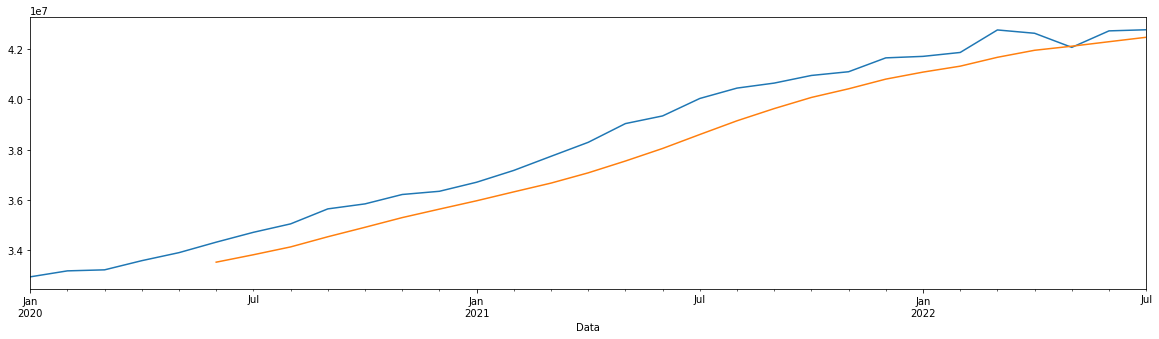

In [35]:
#Médias móveis com janela = 6
df['Acessos'].plot(figsize=(20,5))
df['Acessos'].rolling(window = 6).mean().plot()

In [13]:
mape = np.round(np.mean(np.abs(df['Acessos'] - df['Acessos'].rolling(window = 5).mean())/df['Acessos'])*100,2)
print(mape)

1.81


### Uso médias móveis simples em bases de treino e teste

In [14]:
df.shape

(31, 1)

In [15]:
#Separação em treino e teste
train_len = 25
train = df[0:train_len] # Primeiros 25 dados para treinamento (80%)
test = df[train_len:] # Últimos 6 dados como período de teste (20%)

In [36]:
#Médias móveis simples
y_hat_sma = df.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = df['Acessos'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [37]:
#Visualização das previsões no dataframe
y_hat_sma.head(50)

,Acessos,MM5,MME5,sma_forecast
Data,,,,
2020-01-01,32937919,NaN,NaN,NaN
2020-02-01,33175908,NaN,NaN,NaN
2020-03-01,33216768,NaN,NaN,NaN
2020-04-01,33582173,NaN,NaN,NaN
2020-05-01,33901720,NaN,NaN,NaN
2020-06-01,34319021,3.352225e+07,3.378196e+07,3.352225e+07
2020-07-01,34711249,3.381781e+07,3.407530e+07,3.381781e+07
2020-08-01,35047193,3.412969e+07,3.437317e+07,3.412969e+07
2020-09-01,35643759,3.453419e+07,3.475466e+07,3.453419e+07


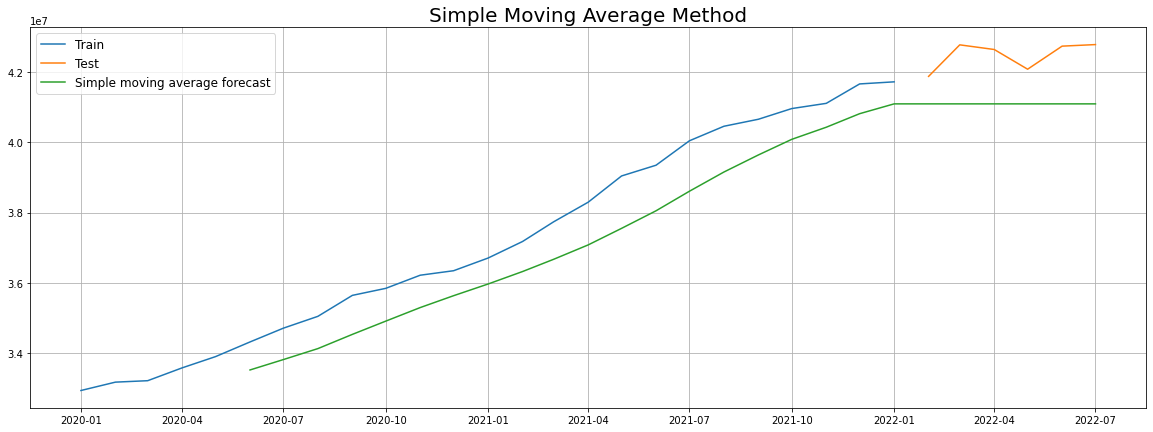

In [38]:
#Visualização dos dados 
plt.figure(figsize=(20,7))
plt.grid()
plt.plot(train['Acessos'], label='Train')
plt.plot(test['Acessos'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best', fontsize='12')
plt.title('Simple Moving Average Method', fontsize='20')
plt.show()

In [39]:
#Cálculo da acurácia da previsão
rmse = np.sqrt(mean_squared_error(test['Acessos'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-y_hat_sma['sma_forecast'][train_len:])/test['Acessos'])*100,2)

In [40]:
#Colocando as métricas num formato de dataframe
results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,1433562.54,3.26


### Uso médias móveis simples e exponencial

In [41]:
#Cálculo da média móvel simples de 5 dias
df['MM5'] = df["Acessos"].rolling(6).mean()
df.head(10)

,Acessos,MM5,MME5
Data,,,
2020-01-01,32937919,NaN,NaN
2020-02-01,33175908,NaN,NaN
2020-03-01,33216768,NaN,NaN
2020-04-01,33582173,NaN,NaN
2020-05-01,33901720,NaN,NaN
2020-06-01,34319021,3.352225e+07,3.378196e+07
2020-07-01,34711249,3.381781e+07,3.407530e+07
2020-08-01,35047193,3.412969e+07,3.437317e+07
2020-09-01,35643759,3.453419e+07,3.475466e+07


In [42]:
#Cálculo da média móvel exponencial
df["MME5"] = df["Acessos"].ewm(span=6, min_periods=6).mean()
df

,Acessos,MM5,MME5
Data,,,
2020-01-01,32937919,NaN,NaN
2020-02-01,33175908,NaN,NaN
2020-03-01,33216768,NaN,NaN
2020-04-01,33582173,NaN,NaN
2020-05-01,33901720,NaN,NaN
2020-06-01,34319021,3.352225e+07,3.378196e+07
2020-07-01,34711249,3.381781e+07,3.407530e+07
2020-08-01,35047193,3.412969e+07,3.437317e+07
2020-09-01,35643759,3.453419e+07,3.475466e+07


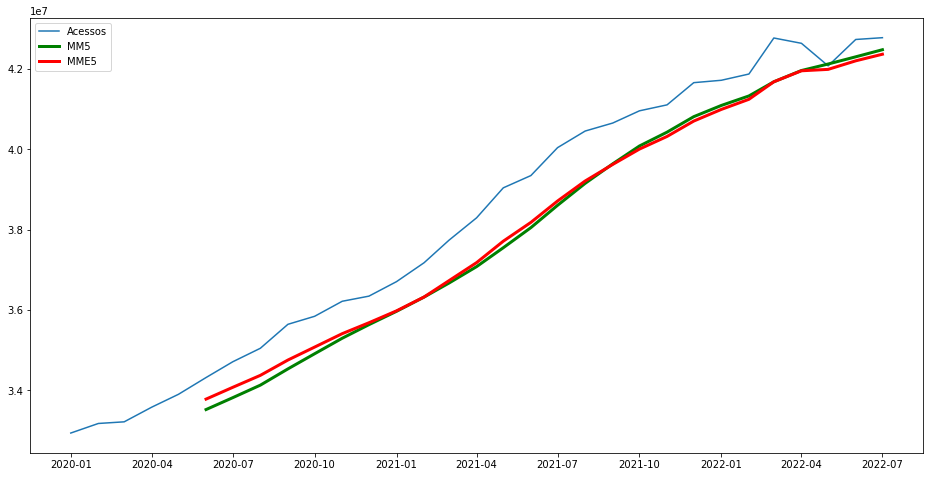

In [43]:
#Visualização dos resultados
plt.figure(figsize=(16,8))
plt.plot(df["Acessos"])
plt.plot(df["MM5"], color="green", linewidth=3)
plt.plot(df["MME5"], color="red", linewidth=3)
plt.legend(df)
plt.show()

In [44]:
#Médias móveis exponencial
y_hat_sma_e = df.copy()
ma_window = 6
y_hat_sma_e['sma_forecast_e'] = df["Acessos"].ewm(span=6, min_periods=6).mean()
y_hat_sma_e['sma_forecast_e'][train_len:] = y_hat_sma_e['sma_forecast_e'][train_len-1]

In [45]:
#Cálculo da acurácia da previsão
rmse = np.sqrt(mean_squared_error(test['Acessos'], y_hat_sma_e['sma_forecast_e'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-y_hat_sma_e['sma_forecast_e'][train_len:])/test['Acessos'])*100,2)

In [46]:
#Colocando as métricas num formato de dataframe
results_e = pd.DataFrame({'Method':['Exponencial moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results_e = results_e[['Method', 'RMSE', 'MAPE']]
results_e

,Method,RMSE,MAPE
0,Exponencial moving average forecast,1529281.01,3.49
